In [43]:
import xarray as xr
import os
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 13})

In [8]:
inputdir = '/Users/bfildier/Data/EUREC4A/merged/radiative_profiles/'

In [21]:
sondes = xr.open_mfdataset([os.path.join(inputdir,'rad_profiles_all_dropsondes.nc'),os.path.join(inputdir,'rad_profiles_all_radiosondes.nc')])


/Users/bfildier/anaconda3/envs/pyLMD/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: In xarray version 0.15 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  """Entry point for launching an IPython kernel.
/Users/bfildier/anaconda3/envs/pyLMD/lib/python3.7/site-packages/xarray/backends/api.py:941: FutureWarning: The datasets supplied do not have global dimension coordinates. In
future, to continue concatenating without supplying dimension
coordinates, please use the new `combine_nested` function (or the
`combine='nested'` option to open_mfdataset.
  from_openmfds=True,


In [22]:
sondes_m1 = xr.open_mfdataset([os.path.join(inputdir,'rad_profiles_all_dropsondes_SSTm1.nc'),os.path.join(inputdir,'rad_profiles_all_radiosondes_SSTm1.nc')])

/Users/bfildier/anaconda3/envs/pyLMD/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: In xarray version 0.15 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  """Entry point for launching an IPython kernel.
/Users/bfildier/anaconda3/envs/pyLMD/lib/python3.7/site-packages/xarray/backends/api.py:941: FutureWarning: The datasets supplied do not have global dimension coordinates. In
future, to continue concatenating without supplying dimension
coordinates, please use the new `combine_nested` function (or the
`combine='nested'` option to open_mfdataset.
  from_openmfds=True,


In [23]:
delta_qrad = sondes.q_rad.values-sondes_m1.q_rad.values

In [83]:
qrad = np.nanmean(sondes.q_rad.values,axis=0)
MSE_qrad = np.nansum(np.power(delta_qrad,2),axis=0)/delta_qrad.shape[0]
RMSE_qrad = np.sqrt(MSE_qrad)
RMSE_qrad_normalized = RMSE_qrad/np.absolute(qrad)
zlay = sondes.zlay
play = sondes.play.values[0][0:]

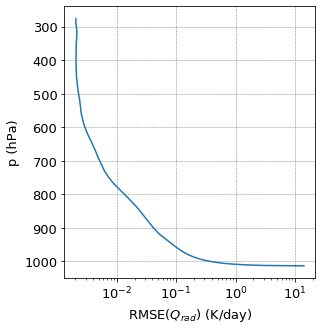

In [102]:
fig,ax = plt.subplots(figsize=(4.5,5))

ax.plot(RMSE_qrad,play/100)
ax.set_xscale('log')
# ax.set_ylim((0,1000))
# ax.set_yscale('log')
ax.invert_yaxis()
ax.grid(color='grey', linestyle='--', linewidth=0.5)

ax.set_xlabel(r'RMSE($Q_{rad}$) (K/day)')
ax.set_ylabel('p (hPa)')

plt.savefig('../Figures/rmse_qrad_1K.pdf',bbox_inches='tight')

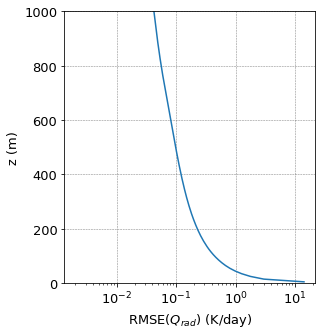

In [103]:
fig,ax = plt.subplots(figsize=(4.5,5))

ax.plot(RMSE_qrad,zlay)
ax.set_xscale('log')
ax.set_ylim((0,1000))
# ax.set_yscale('log')
ax.grid(color='grey', linestyle='--', linewidth=0.5)

ax.set_xlabel(r'RMSE($Q_{rad}$) (K/day)')
ax.set_ylabel('z (m)')

plt.savefig('../Figures/rmse_qrad_1K_BL.pdf',bbox_inches='tight')